In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class IT2_GFHS:
    def __init__(self, K, d, p, q_lower, q_upper, sigma_lower, sigma_upper):
        self.sigma_lower = sigma_lower
        self.sigma_upper = sigma_upper
        self.W_IT2_GFHS = np.array(p+ q_lower+ q_upper).astype(np.float64)#[p, q_lower, q_upper]#
        self.K = K
        self.d = d
    def forward(self, Y_des, u_GFHM, eta = .1):
        sai = np.hstack([np.array([1]),np.tanh(np.diag(self.K) @ (u_GFHM - self.d) / (self.sigma_lower * 0.7143)),np.tanh(np.diag(self.K) @ (u_GFHM - self.d) / self.sigma_upper)])#
        Y_IT2_GFHS = self.W_IT2_GFHS @ sai
        self.Update(Y_IT2_GFHS, Y_des, sai, eta)
        return Y_IT2_GFHS
    def Update(self, Y_IT2_GFHS, y, sai, eta = .1):
        e_IT2_GFHS = y - Y_IT2_GFHS
        self.W_IT2_GFHS += eta * e_IT2_GFHS * sai   #np.array([delta_p+ delta_q_lower.tolist()+ delta_q_upper.tolist()])[0]

In [3]:
p = [0]
q_lower = [0]*3#np.zeros(3)
q_upper = [0]*3#np.zeros(3)
sigma_lower = .7
sigma_upper = 1.2
K = np.array([0.4, 0.9, 1.2])
d = np.array([0.62, 0.25, 0.5])

model = IT2_GFHS(K, d, p, q_lower, q_upper, sigma_lower, sigma_upper)
# Sample Time
z = np.arange(0, 200.1, 0.1)

# Input Signal
u = np.sin(2 * np.pi * z / 100)

# Initial Condition
Y = np.zeros(len(z) + 1)
s = u.shape
Y_IT2_GFHS = []
for i in range(s[0]):
    # Actual System
    Y[i + 1] = Y[i] / (1 + Y[i] ** 2) + u[i] ** 3
    u_GFHM = np.array([Y[i + 1], Y[i], u[i]])
    Y_IT2_GFHS.append(model.forward(Y[i+1], u_GFHM))

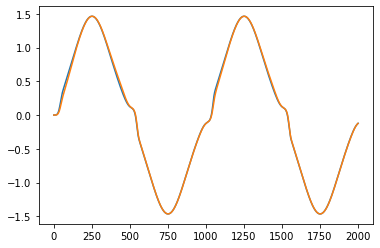

In [4]:
plt.plot(Y)
plt.plot(Y_IT2_GFHS)

In [5]:
# IT2_TSK
W_GFHM = np.zeros((1, 6))
K_GFHM = np.array([0.2, 0.5, 0.8, 1.2, 1.5])
d_GFHM = np.array([[0.25, 0.5, 0.25, 0, 0.5]]).T
sigma_GFHM = 1
delta_GFHM = 0.05
P_GFHM_Example_2 = np.size(W_GFHM) + np.size(K_GFHM) + np.size(d_GFHM.T) + np.size(delta_GFHM)
M_GFHM_Example_2 = 2 ** (np.size(W_GFHM) - np.size(1))

# IT2_TSK
W_IT2_TSK = np.zeros((1, 32))
K_IT2_TSK = np.array([-1.5, -1.2, -1, -0.7, -0.2, 0, 0.1, 0.3, 0.5, 0.9, 1, 1.2, 1.4, 1.6, 2])
p_IT2_TSK = 0.8
q_IT2_TSK = 0.8
sigma_upper_IT2_TSK = 1
sigma_lower_IT2_TSK = 0.7
delta_IT2_TSK = 0.5
P_IT2_TSK_Example_2 = (np.size(W_IT2_TSK) + np.size(K_IT2_TSK) + np.size(p_IT2_TSK) + np.size(q_IT2_TSK) +
                        np.size(sigma_upper_IT2_TSK) + np.size(sigma_lower_IT2_TSK))
M_IT2_TSK_Example_2 = 5

# IT2_GFHM
W_IT2_GFHS = np.zeros((1, 11))
K_IT2_GFHS = np.array([0.2, 0.5, 0.8, 1.2, 1.5])
d_IT2_GFHS = np.array([[0.25, 0.5, 0.25, 0, 0.5]]).T
sigma_upper_IT2_GFHS = 1.1
sigma_lower_IT2_GFHS = 0.7
delta_IT2_GFHS = 0.05
P_IT2_GFHS_Example_2 = (np.size(W_IT2_GFHS) + np.size(K_IT2_GFHS) + np.size(d_IT2_GFHS.T) +
                         np.size(sigma_upper_IT2_GFHS) + np.size(sigma_lower_IT2_GFHS))
M_IT2_GFHS_Example_2 = 2 ** ((np.size(W_IT2_GFHS) - np.size(1)) / 2)

In [6]:
# Sample Time
Tz = 0.1
z = np.arange(0, 250+Tz, Tz)  # Adjusted to ensure that 250 is included in the array

# Input Signals
u1 = np.sin(np.pi * z / 25)
u2 = np.ones(int(250 / Tz))
u3 = -1 * np.ones(int(250 / Tz))
u4 = 0.3 * np.sin(np.pi * z / 25) + 0.1 * np.sin(np.pi * z / 32) + 0.6 * np.sin(np.pi * z / 10)
u = np.concatenate((u1, u2, u3, u4))
s = u.shape
T = 1000
z = np.arange(0, 1000 + Tz*2, Tz)
a = 1.2 - 0.2 * np.cos(2 * np.pi * z / T)
b = 1 - 0.4 * np.sin(2 * np.pi * z / T)
c = 1 + 0.4 * np.sin(2 * np.pi * z / T)
ct21 = 14.5465 / 1000000

# Initial Condition
Y = np.zeros_like(z)  # Assume same length as z 
x1 = 0
x2 = 0
x3 = 0
x4 = 0
x5 = 0

K = K_IT2_GFHS + np.array([0.2, 0.5, 0.8, 0.1, 1.2]) - np.array([0.2, 0.5, 0.8, 1.2, 1.5])
p = [W_IT2_GFHS[0, 0]]
q_lower = W_IT2_GFHS[0, 1:6].tolist()
q_upper = W_IT2_GFHS[0, 6:11].tolist()
d = d_GFHM + np.array([[0.0], [0.0], [0.0], [0.0], [-0.5]])
d = d.reshape([-1])
ct23 = 27.038745 / 1000000
sigma_lower = -0.2 + sigma_lower_IT2_GFHS
sigma_upper = 0.1 + sigma_upper_IT2_GFHS

eta = delta_GFHM
Y_IT2_GFHS = []
model = IT2_GFHS(K, d, p, q_lower, q_upper, sigma_lower, sigma_upper)
for i in range(s[0] - 1):
    # Actual System
    x1 = Y[i]
    x4 = u[i]
    Y[i + 1] = (x1 * x2 * x3 * x5 * (x3 - b[i]) + c[i] * x4) / (a[i] + x2 ** 2 + x3 ** 2)
    u_ = np.array([x1, x2, x3, x4, x5])
    Y_IT2_GFHS.append(model.forward(Y[i+1], u_, 0.05))
    x5 = x4
    x3 = x2
    x2 = x1


No handles with labels found to put in legend.
findfont: Font family ['Cambria Math'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria Math'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria Math'] not found. Falling back to DejaVu Sans.


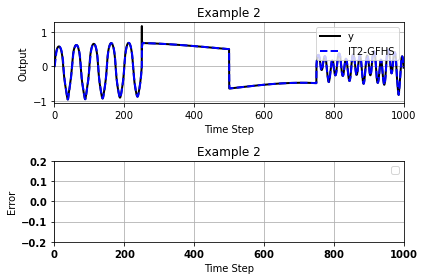

In [7]:
plt.figure(2)  # Explicitly create figure number 2
plt.subplot(2, 1, 1)  # Create the first subplot in a 2x1 grid

# Plot the lines
plt.plot(z[1:], Y[1:], label='y', color='black', linewidth=2)
plt.plot(z[1:], Y_IT2_GFHS[0:], label='IT2-GFHS', linestyle='--', color='blue', linewidth=2)
# plt.plot(z[1:], Y_GFHM[1:], label='GFHM', linestyle=':', color='red', linewidth=2)
# plt.plot(z[1:], Y_IT2_TSK[1:], label='IT2-TSK', linestyle='-.', color=(1, 0.6, 0.7843137383461), linewidth=2)

# Set the properties of the first subplot
plt.title('Example 2')
plt.xlabel('Time Step')
plt.ylabel('Output')
plt.xlim(0.0, 1000.0)
# Uncomment the line below if you want to specify y-axis limits
# plt.ylim(-1.5, 1.8)
plt.legend()
plt.grid(True)  # Use plt.grid instead of box()

# Set font properties using rcParams
plt.rc('font', family='Cambria Math', weight='bold', size=10)

# Create second subplot for the error
plt.subplot(2, 1, 2)  # Create the second subplot in a 2x1 grid

# Plot the lines
# plt.plot(z[1:], e_IT2_GFHS[1:], label='IT2-GFHS', linestyle='--', color='blue', linewidth=2)
# plt.plot(z[1:], e_GFHM[1:], label='GFHM', linestyle=':', color='red', linewidth=2)
# plt.plot(z[1:], e_IT2_TSK[1:], label='IT2-TSK', linestyle='-.', color=(1, 0.6, 0.7843137383461), linewidth=2)

# Set the properties of the second subplot
plt.title('Example 2')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.xlim(0.0, 1000.0)
plt.ylim(-0.2, 0.2)
plt.legend()
plt.grid(True)  # Use plt.grid instead of box()

# Show the figure
plt.tight_layout()  # Adjust the spacing between subplots to prevent label overlap
plt.show()

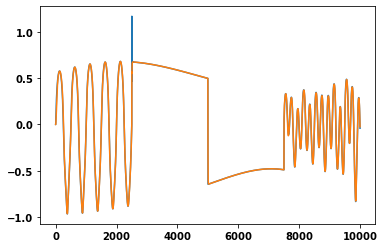

In [8]:
plt.plot(Y)
plt.plot(Y_IT2_GFHS)

# 3

In [9]:
class control:
    def __init__(self, kxf, kxg, df, dg, pf, pg, sig_l, sig_h, dt = .01):
        self.ey = 0
        self.dt = dt
        self.x1 = 0
        self.x2 = 0
        self.model_f = IT2_GFHS(kxf[0],df,pf,[0]*3,[0]*3,sig_l,sig_h)
        self.model_g = IT2_GFHS(kxg[0],dg,pg,[0]*3,[0]*3,sig_l,sig_h)
    def fire(self, r, rd, r2d, f, g):
        raw = 2
        kk = 0.18

        t = np.array([self.x2, self.x2, self.x1])
        fh = self.model_f.forward(f, t, 0.0215)
        gh = self.model_g.forward(g, t, 0.0250)

        y = np.copy(self.x1)
        eyd = rd - self.x2
        s = np.sign(eyd + raw * self.ey)
        u = gh**(-1) * (-fh + r2d + raw * eyd + kk * s)
        self.x1 = self.x1 + self.dt * self.x2
        self.x2 = self.x2 + self.dt * (f + g * u)
        self.ey = r - y
        return y

In [10]:
kxg = np.array([0.7, 0.8, 0.9]) + np.array([[0.5, 0.8, 1.2]]) - np.array([0.5, 0.8, 1.2])
pg = [0.1 * 2.5 / 3 + .3 - 0.3]
qlg = np.array([0., 0., 0.])#Wg_IT2_GFHS[0, 1:4]
qhg = np.array([0., 0., 0.])#Wg_IT2_GFHS[0, 4:7]

kxf = np.array([0, 4.3, 7.8]) + np.array([[0. , 4.3, 7.8]]) - np.array([0, 4.3, 7.8])
pf = [0.158 * 0.887010385171315 / 0.887010385171315 + .8 - 0.8]
qlf = np.array([0., 0., 0.])
qhf = np.array([0., 0., 0.])

df = np.array([1,0.5,2])
dg = np.array([0.05,0.1,0.05])

In [11]:
model = control(kxf,kxg,df,dg,pf,pg,sig_l=.8,sig_h=1.2)
dk = 0.01
dt = 0.01
ct33 = 81.087451 / 1000000
k = np.arange(0, 10 + dk, dk)
y = np.array([np.pi/18, 0]+[0]*(len(k)-1))
pi = np.pi
r = 1 * pi/18 * np.sin(2 * pi * k / 4)
rd = 1 * pi/18 * pi * np.cos(2 * pi * k / 4) / 2
r2d = -1 * pi/18 * pi**2 * np.sin(2 * pi * k / 4) / 4
M = 0.2
m = 0.5
l = 1

# for ii in range(20):
for i in range(len(k)):
    x1 = model.x1
    x2 = model.x2
    f = -(m * l * x2**2 * np.sin(x1) * np.cos(x1) -
                (M + m) * 9.8 * np.sin(x1)) / ((M + m) * l + m * l * np.cos(x1)**2)
    g = np.cos(x1) / ((M + m) * l + m * l * np.cos(x1)**2)
    y[i] = model.fire(r[i],rd[i],r2d[i],f,g)

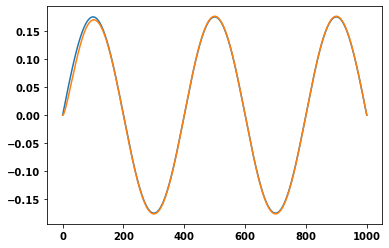

In [12]:
plt.plot(r)
plt.plot(y)

In [13]:
dk = 0.01
dt = 0.01
ct33 = 81.087451 / 1000000
k = np.arange(0, 10 + dk, dk)



f = np.float64(np.array([0, 0]+[0]*(len(k)-1)))
fh = np.float64(np.array([0, 0]+[0]*(len(k)-1)))
g = np.float64(np.array([0, 0]+[0]*(len(k)-1)))
gh = np.float64(np.array([0, 0]+[0]*(len(k)-1)))
u = np.longdouble(np.array([0, 0]+[0]*(len(k)-1)))
y = np.array([np.pi/18, 0]+[0]*(len(k)-1))
y1 = np.array([np.pi/18, 0]+[0]*(len(k)-1))

pi = np.pi
# y1 = np.array([pi/18, 0])
x1 = np.array([y[0]]+[0]*len(k))
x2 = np.array([y[1]]+[0]*len(k))

r = 1 * pi/18 * np.sin(2 * pi * k / 4)
rd = 1 * pi/18 * pi * np.cos(2 * pi * k / 4) / 2
r2d = -1 * pi/18 * pi**2 * np.sin(2 * pi * k / 4) / 4
M = 0.2
m = 0.5
l = 1

# Assuming these are numpy arrays
kxg = np.array([0.7, 0.8, 0.9]) + np.array([[0.5, 0.8, 1.2]]) - np.array([0.5, 0.8, 1.2])
pg = [0.1 * 2.5 / 3 + .3 - 0.3]
qlg = np.array([0., 0., 0.])#Wg_IT2_GFHS[0, 1:4]
qhg = np.array([0., 0., 0.])#Wg_IT2_GFHS[0, 4:7]
dg = np.array([[0.05],[1.  ],[0.05]]) - np.array([0.05, 1, 0.05]) + np.array([0.05, 0.1, 0.05])

kxf = np.array([0, 4.3, 7.8]) + np.array([[0. , 4.3, 7.8]]) - np.array([0, 4.3, 7.8])
pf = 0.158 * 0.887010385171315 / 0.887010385171315 + .8 - 0.8
qlf = np.array([0., 0., 0.])
qhf = np.array([0., 0., 0.])
df = np.array([[1. ],[1.5],[2. ]]) - np.array([1, 1.5, 2]) + np.array([1, 0.5, 2])

etaf = 0.0215 * delta_IT2_GFHS / 25
etag = 0.025 * delta_IT2_GFHS / 25

raw = 2

kk = 0.18

lf = 0.8 * sigma_lower_IT2_GFHS / 0.89
hf = 1.2 * sigma_upper_IT2_GFHS / 1.09

lg = 0.8 * sigma_lower_IT2_GFHS / 0.89
hg = 1.2 * sigma_upper_IT2_GFHS / 1.09

df = np.array([1,0.5,2])
dg = np.array([0.05,0.1,0.05])

In [14]:
eyd = np.zeros([len(k)])
ef = np.zeros([len(k)])
eg = np.zeros([len(k)])
u_IT2_GFHM = np.zeros([len(k)])
# toc_IT2_GFHS3 = np.zeros([len(k)])
fh = np.zeros([len(k)+1])
gh = np.zeros([len(k)+1])
ey = np.zeros([len(k)+1])
pf = [0.158]
pg = [0.083333333]
model_f = IT2_GFHS(kxf[0],df,pf,[0]*3,[0]*3,0.8,1.2)
model_g = IT2_GFHS(kxg[0],dg,pg,[0]*3,[0]*3,0.8,1.2)
# print(fasjlasf)
for ii in range(50):
    for i in range(len(k)):
        t = np.array([x2[i], x2[i], x1[i]])

        f[i] = -(m * l * x2[i]**2 * np.sin(x1[i]) * np.cos(x1[i]) -
                 (M + m) * 9.8 * np.sin(x1[i])) / ((M + m) * l + m * l * np.cos(x1[i])**2)
        g[i] = np.cos(x1[i]) / ((M + m) * l + m * l * np.cos(x1[i])**2)
        
        fh[i] = model_f.forward(f[i], t, 0.0215*10)
        gh[i] = model_g.forward(g[i], t, 0.0250*10)

        y[i] = x1[i]
        eyd[i] = rd[i] - x2[i]
        s = np.sign(eyd[i] + raw * ey[i])
        u[i] = 1/gh[i] * (-fh[i] + r2d[i] + raw * eyd[i] + kk * s)
        u_IT2_GFHM[i] = u[i]
        x1[i + 1] = x1[i] + dt * x2[i]
        x2[i + 1] = x2[i] + dt * (f[i] + g[i] * u[i])

        ey[i + 1] = r[i] - y[i]
        # if i < (len(k) - 1):  # Check to avoid index out of bounds
        #     x1[i + 1] = x1[i] + dt * x2[i]
        #     x2[i + 1] = x2[i] + dt * (f[i] + g[i] * u[i])
        #     toc_IT2_GFHS3[i] = ct33
        #     ey[i + 1] = r[i] - y[i]
    #     break
    # break
        ef[i] = f[i] - fh[i]
        eg[i] = g[i] - gh[i]
        

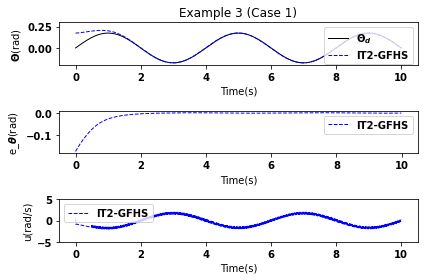

In [15]:
import matplotlib.pyplot as plt

# Assuming the variables 'k', 'r', 'y', 'y1', 'y_IT2_TSK', 'ey', 'ey1', 'ey_IT2_TSK', 
# 'u_IT2_GFHM', 'u_GFHM', 'u_IT2_TSK' are already defined and correspond to your data

# y subplot
plt.subplot(3, 1, 1)
plt.plot(k, r, label=r'$\Theta_d$', linestyle='-', color='black', linewidth=1)
plt.plot(k, y[1:], label='IT2-GFHS', linestyle='--', color='blue', linewidth=1)
# plt.plot(k, y1, label='GFHM', linestyle=':', color='red', linewidth=1)
# plt.plot(k, y_IT2_TSK, label='IT2-TSK', linestyle='-.', color=[1, 0.6, 0.7843137383461], linewidth=1)
plt.title('Example 3 (Case 1)')
plt.xlabel('Time(s)')
plt.ylabel(r'$\Theta$(rad)')
plt.ylim([-0.2, 0.3])
plt.xticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.yticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.legend()

# ey subplot
plt.subplot(3, 1, 2)
plt.plot(k[:-1], ey[1:-1], label='IT2-GFHS', linestyle='--', color='blue', linewidth=1)
# plt.plot(k[:-1], ey1[:-1], label='GFHM', linestyle=':', color='red', linewidth=1)
# plt.plot(k[:-1], ey_IT2_TSK[:-1], label='IT2-TSK', linestyle='-.', color=[1, 0.6, 0.7843137383461], linewidth=1)
plt.xlabel('Time(s)')
plt.ylabel('e_$\\theta$(rad)')
plt.xticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.yticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.legend()

# u subplot
plt.subplot(3, 1, 3)
plt.plot(k[::1], np.array(u_IT2_GFHM)[::1], label='IT2-GFHS', linestyle='--', color='blue', linewidth=1)
# plt.plot(k[::1], u_GFHM[::1], label='GFHM', linestyle=':', color='red', linewidth=1)
# plt.plot(k[::1], u_IT2_TSK[::1], label='IT2-TSK', linestyle='-.', color=[1, 0.6, 0.7843137383461], linewidth=1)
plt.xlabel('Time(s)')
plt.ylabel('u(rad/s)')
plt.ylim([-5, 5])
plt.xticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.yticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


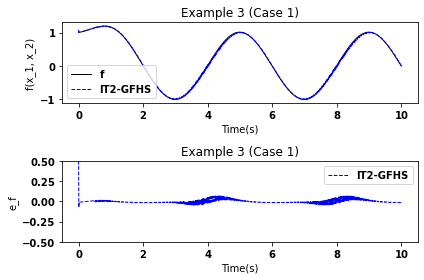

In [16]:
import matplotlib.pyplot as plt

# Assuming the variables 'k', 'f', 'fh', 'fh1', 'fh_IT2_TSK', 'ef', 'ef1', 'ef_IT2_TSK' 
# are already defined and correspond to your data

# Create a new figure
plt.figure(4)

# First subplot for f
plt.subplot(2, 1, 1)
plt.plot(k, f[1:], label='f', linestyle='-', color='black', linewidth=1)
plt.plot(k, fh[1:], label='IT2-GFHS', linestyle='--', color='blue', linewidth=1)
# plt.plot(k, fh1, label='GFHM', linestyle=':', color='red', linewidth=1)
# plt.plot(k, fh_IT2_TSK, label='IT2-TSK', linestyle='-.', color=[1, 0.6, 0.7843137383461], linewidth=1)
plt.title('Example 3 (Case 1)')
plt.xlabel('Time(s)')
plt.ylabel('f(x_1, x_2)')
plt.xticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.yticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.legend()

# Second subplot for ef
plt.subplot(2, 1, 2)
plt.plot(k, ef, label='IT2-GFHS', linestyle='--', color='blue', linewidth=1)
# plt.plot(k, ef1, label='GFHM', linestyle=':', color='red', linewidth=1)
# plt.plot(k, ef_IT2_TSK, label='IT2-TSK', linestyle='-.', color=[1, 0.6, 0.7843137383461], linewidth=1)
plt.title('Example 3 (Case 1)')
plt.xlabel('Time(s)')
plt.ylabel('e_f')
plt.ylim([-0.5, 0.5])
plt.xticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.yticks(fontname='Cambria Math', fontsize=10, fontweight='bold')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
